# PCA
In this notebook, I will also use the college data to do PCA.

### First, load necessary libraries and data.

In [7]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('college_data.csv')

### Then, let's try to use the internal package to do PCA.

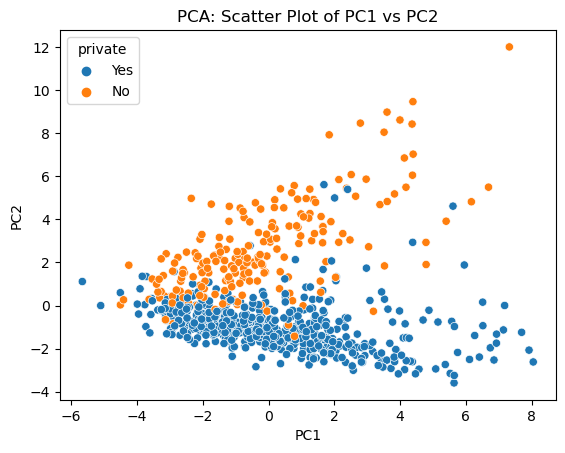

In [4]:
# Assuming df is your DataFrame
X = df.drop('private', axis=1)  # Exclude the target variable if applicable
y = df['private']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(X_standardized)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate with the target variable if needed
df_pca['private'] = y

# Visualize the transformed data
sns.scatterplot(x='PC1', y='PC2', hue='private', data=df_pca)
plt.title('PCA: Scatter Plot of PC1 vs PC2')
plt.show()

#### I first keep 2 principle componants for 'private'.

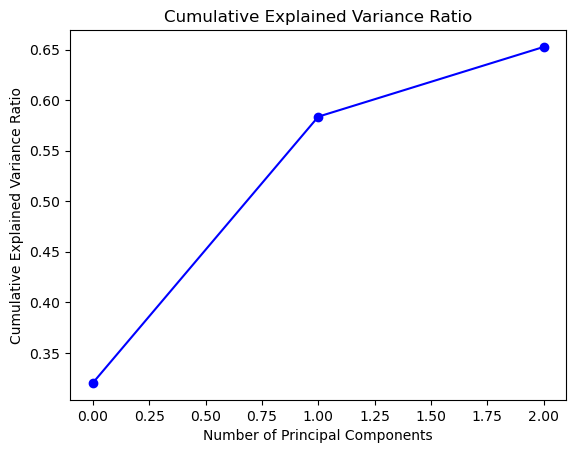

In [8]:
pca1 = PCA(n_components=3)  # Specify the number of components
X_pca1 = pca1.fit_transform(X_standardized)

# Create a new DataFrame with the principal components
df_pca1 = pd.DataFrame(data=X_pca1, columns=['PC1', 'PC2', 'PC3'])

# Concatenate with the target variable if needed
df_pca1['private'] = y

explained_variance_ratio = pca1.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


#### Then, I change the number of principle components to 3 and draw the cumulative explained ratio. If just principle componants are kept, it can only explain about 65%, not very high, so I need to change the number of principle components.

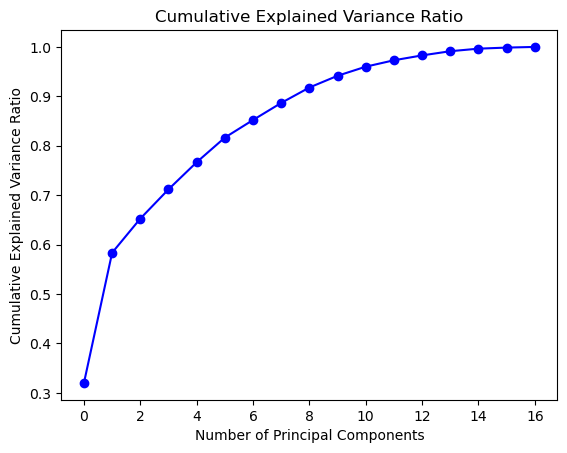

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443   
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753   
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276   
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356   
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220   
..        ...       ...       ...       ...       ...       ...       ...   
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429 -0.165021   
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343  0.848453   
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014 -1.317492   
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937  0.083328   
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893  1.307313   

          PC8       PC9      PC10      PC11 private  
0   -0.879386  0.0930

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


#### According to the plot, choosing 10 principle componants is appropriate. It can explain about 95% of true data.

### What about using raw codes to do PCA?

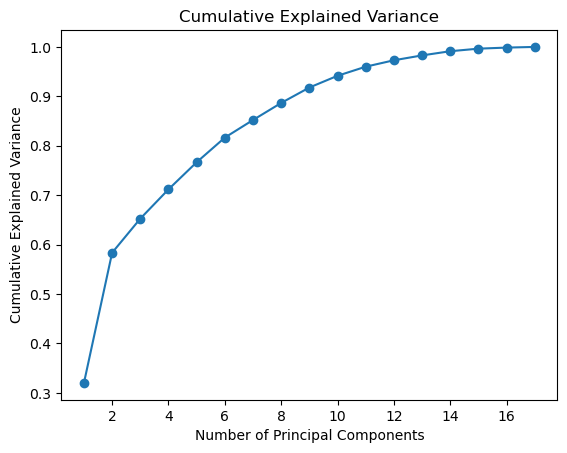

In [23]:

def pca(X, num_components):
    # Standardize the features
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the new basis
    X_pca = np.dot(X_standardized, principal_components)

    return X_pca, eigenvalues

# Example usage:
num_components = 3
X_pca_custom, eigenvalues = pca(X, num_components)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
